In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from helpers.dataset import dataset_experiments, compute_spectrum
from IPython.display import Video
%load_ext autoreload
%autoreload 2

In [9]:
common_folder = '/scratch/cimes/cz3321/MOM6/experiments/double_gyre/R4_sensitivity'
# Attenuation
pct=np.arange(0.1,1.1,0.1)
member_num=10
exps1 = []
for p in pct*100:
    globals()['exps'+str(int(p))] = [None]*member_num
    for i in range(1,member_num+1):
        globals()['exps'+str(int(p))][i-1] = 'P' + '{:0>3d}'.format(int(p)) + '_m' + '{:0>3d}'.format(i)
    exps1 +=  [globals()['exps'+str(int(p))]]
# Fitting
fit=160
globals()['exps'+str(int(fit))] = [None]*member_num
for i in range(1,member_num+1):
    globals()['exps'+str(int(fit))][i-1] = 'P' + '{:0>3d}'.format(int(fit)) + '_m' + '{:0>3d}'.format(i)
exps2 =  globals()['exps'+str(int(fit))]
# Refrence
exps0 = ['R4','R32']
exps = []
for i in range(len(exps1)): exps += exps1[i]
exps = exps+exps2+exps0
print(exps)

['P010_m001', 'P010_m002', 'P010_m003', 'P010_m004', 'P010_m005', 'P010_m006', 'P010_m007', 'P010_m008', 'P010_m009', 'P010_m010', 'P020_m001', 'P020_m002', 'P020_m003', 'P020_m004', 'P020_m005', 'P020_m006', 'P020_m007', 'P020_m008', 'P020_m009', 'P020_m010', 'P030_m001', 'P030_m002', 'P030_m003', 'P030_m004', 'P030_m005', 'P030_m006', 'P030_m007', 'P030_m008', 'P030_m009', 'P030_m010', 'P040_m001', 'P040_m002', 'P040_m003', 'P040_m004', 'P040_m005', 'P040_m006', 'P040_m007', 'P040_m008', 'P040_m009', 'P040_m010', 'P050_m001', 'P050_m002', 'P050_m003', 'P050_m004', 'P050_m005', 'P050_m006', 'P050_m007', 'P050_m008', 'P050_m009', 'P050_m010', 'P060_m001', 'P060_m002', 'P060_m003', 'P060_m004', 'P060_m005', 'P060_m006', 'P060_m007', 'P060_m008', 'P060_m009', 'P060_m010', 'P070_m001', 'P070_m002', 'P070_m003', 'P070_m004', 'P070_m005', 'P070_m006', 'P070_m007', 'P070_m008', 'P070_m009', 'P070_m010', 'P080_m001', 'P080_m002', 'P080_m003', 'P080_m004', 'P080_m005', 'P080_m006', 'P080_m007'

In [10]:
ds = dataset_experiments(common_folder, exps)

# Attenuation of parameterization

[0.00249574 0.00240666 0.00251652 0.00248613 0.00256892 0.00260846
 0.00275742 0.0030565  0.00359458 0.00446721]
[5.94236411e-05 4.97016499e-05 4.92427166e-05 4.81330276e-05
 4.42282711e-05 4.48932248e-05 4.80313853e-05 6.19864361e-05
 1.00257695e-04 1.86640400e-04]


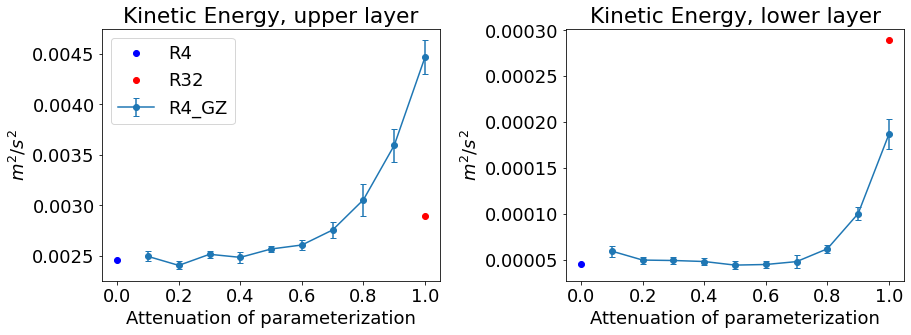

In [9]:
ds.plot_KE_sensitivity(pct,exps1,exps0)

In [22]:
print([exp[0] for exp in exps1])

['P010_m001', 'P020_m001', 'P030_m001', 'P040_m001', 'P050_m001', 'P060_m001', 'P070_m001', 'P080_m001', 'P090_m001', 'P100_m001']


# Relative vorticity for $1/4^o$ coarse model with different attenuation parameterization

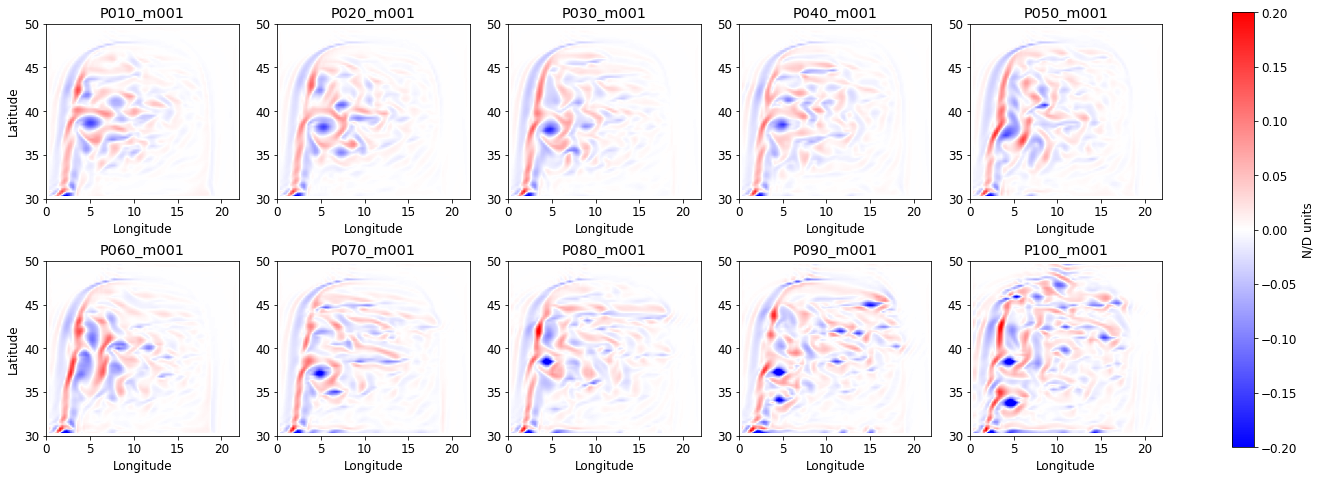

In [5]:
video_name = ds.plot_relative_vorticity_animation([exp[0] for exp in exps1])
Video(video_name,width=1000)

# Sea Surface Height, $1/4^o$ with different attenuation parameterization

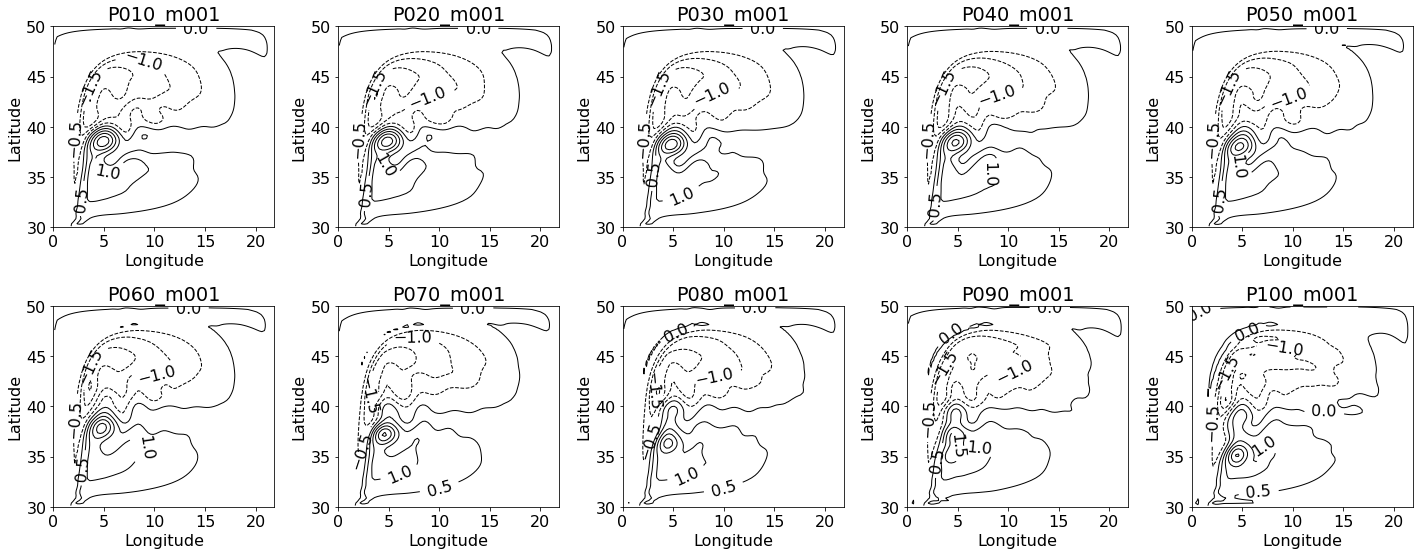

In [24]:
ds.plot_ssh([exp[0] for exp in exps1])

# Relative vorticity for $1/4^o$ coarse model with 80% attenuation parameterization

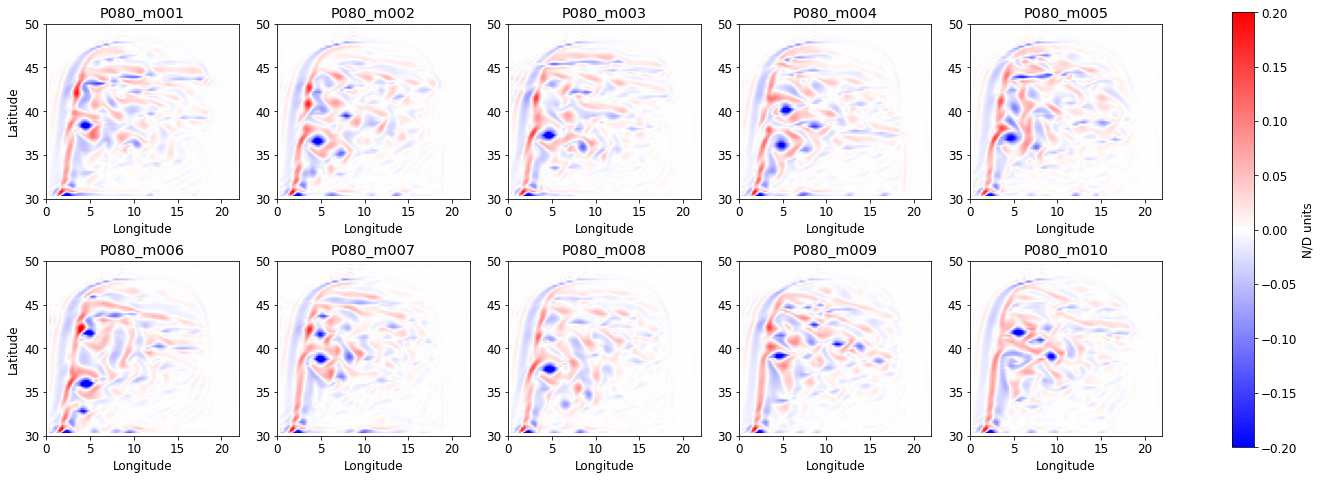

In [25]:
ds.plot_relative_vorticity_snapshot(exps1[7][:10])

# Sea Surface Height, $1/4^o$ with 80% attenuation parameterization

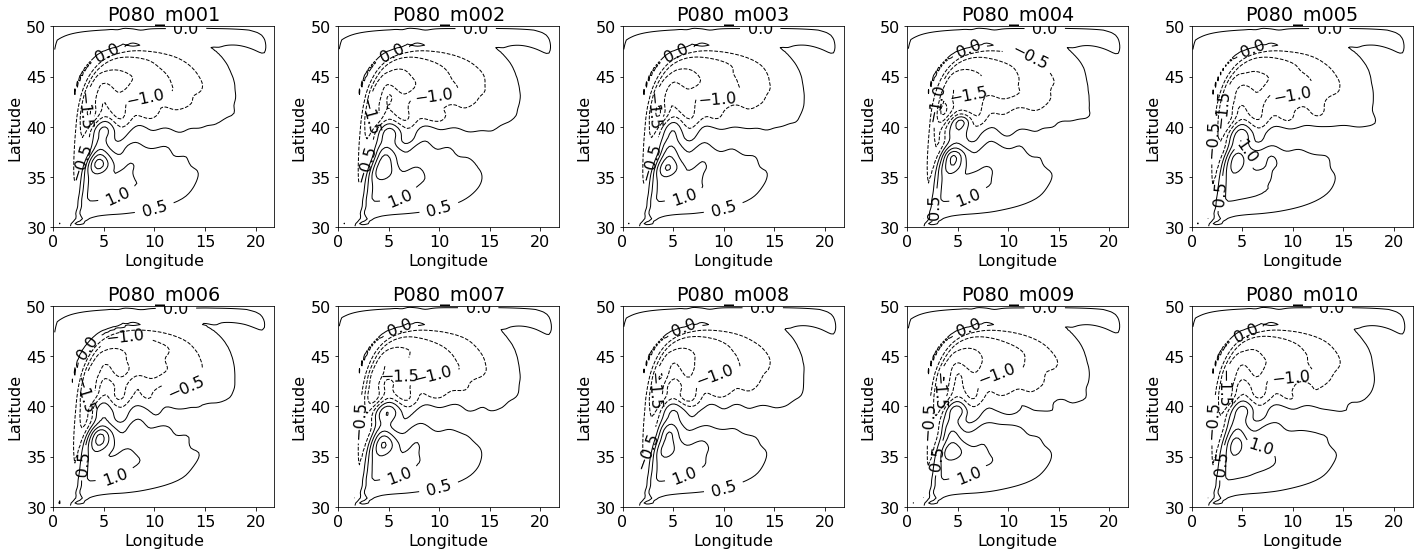

In [26]:
ds.plot_ssh(exps1[7][:10])

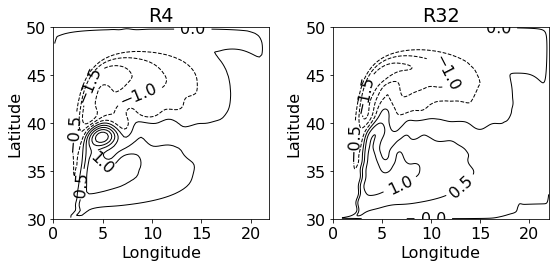

In [63]:
ds.plot_ssh(exps0)

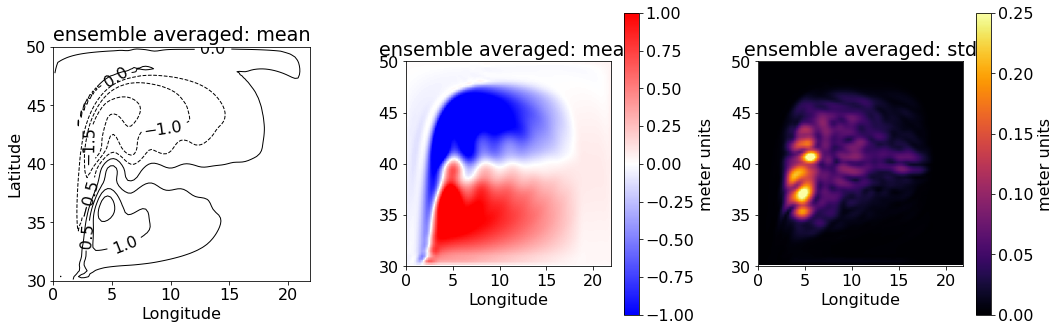

In [55]:
ds.plot_ssh_ensembles(exps1[7])

# KE series, $1/4^o$ with 80% attenuation parameterization

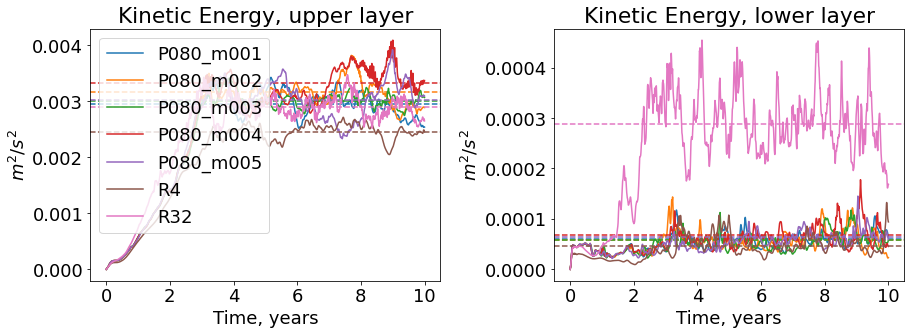

In [64]:
ds.plot_KE(exps1[7][:5]+exps0)

# KE spectra for $1/4^o$ coarse model with 80% attenuation parameterization

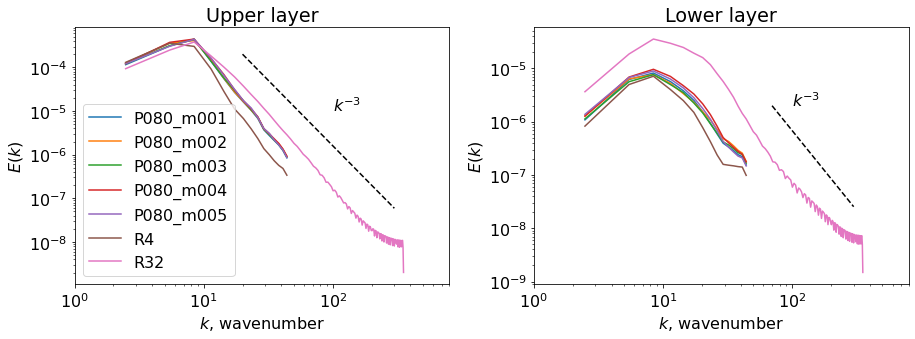

In [58]:
ds.plot_KE_spectrum(exps1[7][:5]+exps0, nfactor=2)

# Fitting the parameter with 70% for upper layer and 110% for lower layer

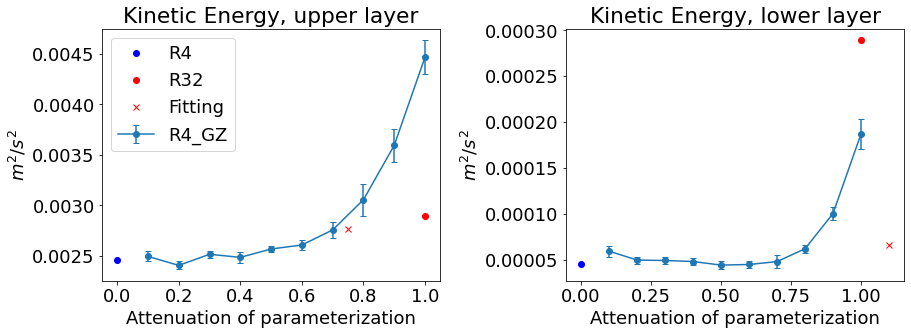

In [4]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.70,1.1])
#110

# Fitting the parameter with 70% for upper layer and 150% for lower layer

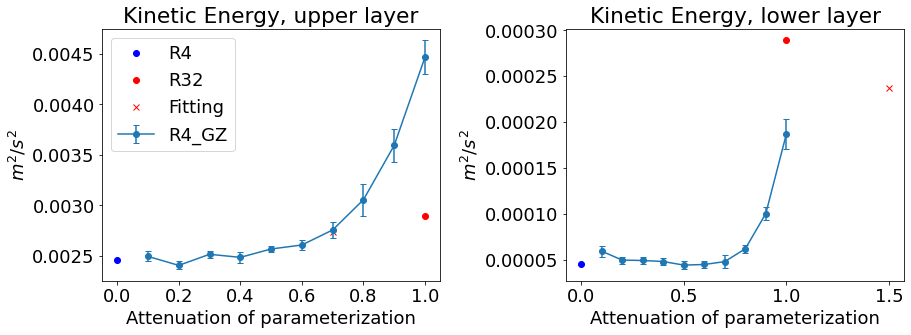

In [7]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.7,1.5])
#120

# Fitting the parameter with 70% for upper layer and 170% for lower layer

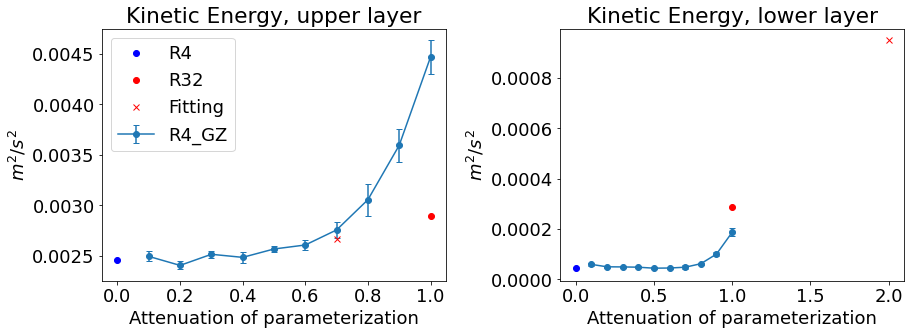

In [4]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.7,1.7])
#140

# Fitting the parameter with 70% for upper layer and 200% for lower layer

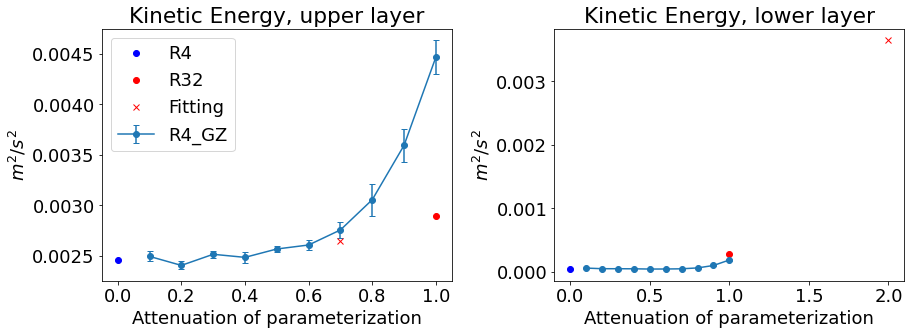

In [5]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.7,2.0])
#130

# Fitting the parameter with 80% for upper layer and 150% for lower layer

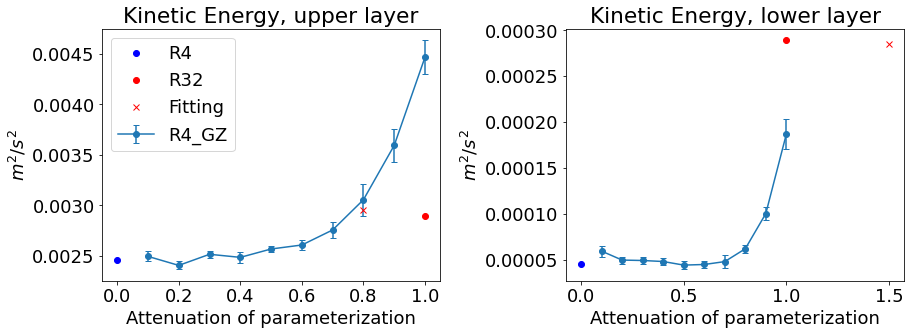

In [7]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.8,1.5])
#150

# Fitting the parameter with 80% for upper layer and 170% for lower layer

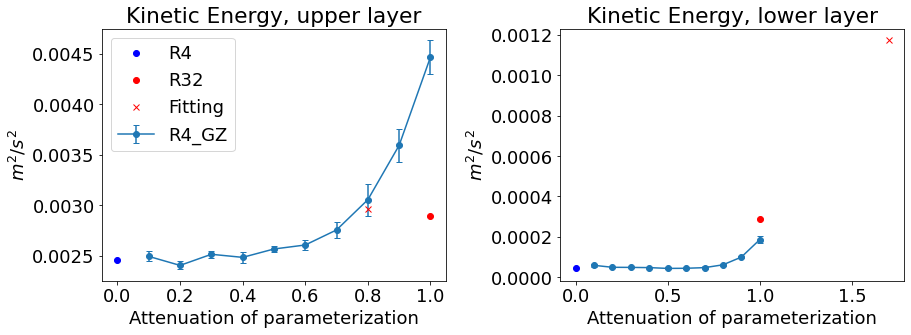

In [11]:
ds.plot_KE_sensitivity(pct,exps1,exps0,fitting=True, exps2 = exps2,param=[0.8,1.7])
#160